## Trabajo Práctico Machine Learning Análisis Exploratorio

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import zipfile

### Dataset

El dataset elegido para el TP se trata de anuncios clasificados de autos. Nuestra idea es poder predecir el precio del auto en base a los datos de las distintas columnas.

Fuente del dataset: https://www.kaggle.com/mirosval/personal-cars-classifieds/data

In [2]:
zf = zipfile.ZipFile('Data/cars_ads.zip')
datos = pd.read_csv(zf.open('cars_ads.csv'))


/home/gabrieltassone/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Renombramos las columnas del dataset

Como "convención" decidimos nombrarlas en español, en minúscula, en caso de ser dos palabras o más separarlas con _.

In [3]:
NOMBRES_COLUMNAS = {
    'maker' : 'fabricante',
    'model' : 'modelo',
    'mileage' : 'km',
    'manufacture_year' : 'año_fabricacion',
    'engine_displacement' : 'cilindrada',
    'engine_power' : 'caballos_fuerza',
    'body_type' : 'tipo_carroceria',
    'color_slug' : 'color',
    'stk_year' : 'año_control',
    'transmission' : 'transmision',
    'door_count' : 'cantidad_puertas',
    'seat_count' : 'cantidad_asientos',
    'fuel_type' : 'combustible',
    'date_created' : 'fecha_publicacion',
    'date_last_seen' : 'fecha_ultima_visita',
    'price_eur' : 'precio'
}
datos.rename(columns=NOMBRES_COLUMNAS, inplace=True)

## Análisis preliminar

Comenzamos haciendo un análisis básico de los datos para tomar conciencia de la demensión del dataset, de la información que contiene cada fila, los tipos de datos de cada columna, etc.

#### Dimensiones del dataset

El dataset cuenta con 3552912 filas y 16 columnas. El hecho de que tenga tantas filas puede ser una ventaja ya que vamos a poder tener conjuntos de train, test y validate con una buena cantidad de datos cada uno. 

In [4]:
datos.shape

(3552912, 16)

#### Tipos de datos de las columnas

In [5]:
datos.dtypes

fabricante              object
modelo                  object
km                     float64
año_fabricacion        float64
cilindrada             float64
caballos_fuerza        float64
tipo_carroceria         object
color                   object
año_control             object
transmision             object
cantidad_puertas        object
cantidad_asientos       object
combustible             object
fecha_publicacion       object
fecha_ultima_visita     object
precio                 float64
dtype: object

In [6]:
datos.head()

,fabricante,modelo,km,año_fabricacion,cilindrada,caballos_fuerza,tipo_carroceria,color,año_control,transmision,cantidad_puertas,cantidad_asientos,combustible,fecha_publicacion,fecha_ultima_visita,precio
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [7]:
datos.describe()

,km,año_fabricacion,cilindrada,caballos_fuerza,precio
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


#### Valores nulos que posee cada columna

Podemos observar que el dataset posee bastantes valores nulos, algo que vamos a tener en cuenta, en primer lugar, para decidir que columnas vamos a utilizar como entradas, y luego al momento de entrenar y probar los distintos modelos de ML.

In [8]:
datos.isnull().sum()

fabricante              518915
modelo                 1133361
km                      362584
año_fabricacion         370578
cilindrada              743414
caballos_fuerza         554877
tipo_carroceria        1122914
color                  3343411
año_control            1708156
transmision             741630
cantidad_puertas        614373
cantidad_asientos       749489
combustible            1847606
fecha_publicacion            0
fecha_ultima_visita          0
precio                       0
dtype: int64

## Análisis exploratorio

### Definición de variables

A continuación, vamos a definir el significado de cada variable y su tipo de dato. 

* fabricante: nombre de la marca o fabricante del auto. Tipo: string.             
* modelo: modelo o linea del auto. Tipo: string.
* km: cantidad de KM que posee el auto. Tipo: float.                      
* año_fabricacion: año en el que fue fabricado. Tipo: float.         
* cilindrada: cilindrada en ccm. Tipo: float.              
* caballos_fuerza: caballos de fuerza en kW. Tipo: float.   
* tipo_carroceria: estilo de carrocería del auto. Tipo: string.         
* color: color del auto. Tipo: string.                  
* control: fecha ultimo control de emisión o service del auto. Tipo: int.                
* transmision: tipo de transmisión del auto. Puede ser manual o automática. Tipo: string.           
* cantidad_puertas: cantidad de puertas que posee el auto. Tipo: int.        
* cantidad_asientos: cantidad de asientos. Tipo: int.      
* combustible: tipo de combustible que utiliza. Puede tomar los siguientes valores: gasoline, diesel, lpg, electric, cng. Tipo: string.     
* fecha_publicacion: fecha en la que se publico el anuncio del auto. Tipo: DateTime.        
* fecha_ultima_visita: fecha en la que se vió por última vez el anuncio. Tipo: DateTime.       
* precio: precio del auto en euros. Tipo: float.                       

### Variables de entrada

#### Vamos a utilizar las siguientes variables como entradas:

* km
* año_fabricacion
* cilindrada
* caballos_fuerza
* tipo_carroceria
* año_control
* transmision
* cantidad_puertas
* cantidad_asientos
* combustible

#### Transformaciones que vamos a tener que realizar con las variables de entrada:

* km: creemos que podría ser posible aplicar la técnica de feature engineering de redondeo. Este redondeo podría realizarse a nivel de centenas o unidades de mil, por ejemplo: 143476.0 KM quedaría 143500.0 KM o 144000.0 KM, ya que consideramos que una diferencia menor a 100 o 1000 KM no debería influir demasiado en el precio del auto.
* tipo_carroceria: vamos a definir una columna nueva con un número para cada posible valor que puede tomar la columna. van = 1, compact = 2, transporter = 3, coupe = 4, convertible = 5, sedan = 6, stationwagon = 7, offroad = 8, other = 9. 
* transmision: vamos a definir una columna nueva cuyos valores sean 0 si es transmisión manual y 1 si es transmisión automática.
* combustible: vamos a definir un número para cada valor posible. diesel = 1, gasoline = 2, lpg = 3, cng = 4, electric = 5. 

Luego, para los modelos que sea necesario, se deberían normalizar las entradas, es decir, transformar los valores de manera que queden dentro del rango de 0-1. 

Deberíamos decidir que hacer con los valores nulos de cada fila, eliminar datos duplicados, encontrar valores de tipo "Outliers" 

In [9]:
datos.tipo_carroceria.unique()

array([nan, 'van', 'compact', 'transporter', 'coupe', 'convertible',
       'other', 'sedan', 'stationwagon', 'offroad'], dtype=object)

In [10]:
datos.combustible.unique()

array(['diesel', 'gasoline', nan, 'lpg', 'cng', 'electric'], dtype=object)

#### No vamos a utilizar las siguientes variables: 

* fabricante: el modelo podría overfitear ya que puede aprender que x marca suele ser cara y devuelva siempre el mismo rango de valores. 
* modelo: mismo caso que con el fabricante, podría darse que para x modelo devuelva siempre el mismo rango de valores sin tener en cuenta los demas datos. 
* color: hay muy pocos datos, de 3552912 registros, hay 3343411 que no poseen datos del color.  
* fecha_publicacion: consideramos que la fecha de publicacion no es un dato que se debería tener en cuenta para predecir el precio de un auto.  
* fecha_ ultima_visita: consideramos que la fecha de última visita no es un dato que se debería tener en cuenta para predecir el precio de un auto.  

Estas dos últimas variables podrían considerarse si los anuncios fueran de Argentina ya que los precios cambiarían de acuerdo a la inflación que tenemos en un momento dado, y la inflación puede ir subiendo o bajando con el correr de los meses/años. 

### Variable de Salida

Nuestra variable a predecir va a ser el precio del auto, expresado en categorias o rangos de precios, a modo de respetar la consigna del TP en cuanto a que la variable de salida debe ser una variable categórica.

Los valores posibles van a ser: A, B y C. 

La categoría A van a ser los autos cuyo precio sea menor a 5000.
La categoría B va a incluir los autos cuyo precio sea mayor o igual a 5000 y menor o igual a 9000.
La categoría C los autos cuyo precio sea mayor a 9000. 

In [11]:
conditions = [
    (datos['precio'] < 4000),
    (datos['precio'] >= 4000) & (datos['precio'] <= 10000),
    (datos['precio'] > 10000)]
choices = ['A', 'B', 'C']
datos['categoria_auto'] = np.select(conditions, choices)

### Balanceo de la variable salidas

A continuación vamos a graficar la salida para poder obtener una representación visual de la cantidad de datos pertenecientes a cada categoría. 

Text(0.5,1,'Cantidad de autos por categoría')

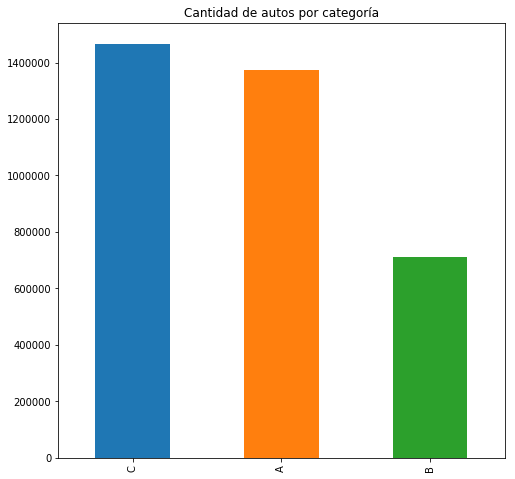

In [12]:
grafico = datos.categoria_auto.value_counts().plot.bar(figsize=(8,8))
grafico.set_title('Cantidad de autos por categoría')

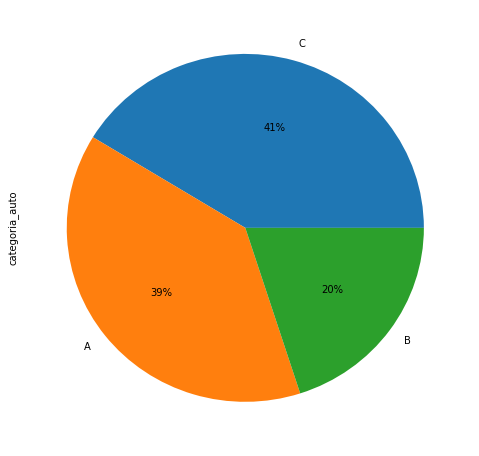

In [13]:
datos.categoria_auto.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

Como podemos ver, el set de datos se encuentra medianamente balanceado. 

* Un 41% que pertencen a la categoría C. Es decir, el 41% de los autos tiene un precio mayor a 9000 euros.
* Un 39% que pertencen a la categoría A. Es Consideramos que la diferencia que existe entre las distintas categorías no debería tener un gran impacto a la hora de entrenar y evaluar los modelos. decir, el 39% de los autos tiene un precio menor a 4000 euros.
* Un 20% que pertencen a la categoría B. Es decir, el 20% de los autos tiene un precio mayor o igual a 4000 euros y menor o igual a 9000 euros. 

Si bien la diferencia entre las distintas categorías no es tan grande, podríamos recortar el set de datos de modo que las cantidades de A y C se ajusten a las de B o podríamos definir distintos pesos. 

## Análisis del comportamiento de variables

A continuación vamos a analizar y graficar el comportamiento de algunas variables con respecto a la variable de salida. 

#### Variable: combustible

Text(0.5,1,'# de autos por tipo de combustible')

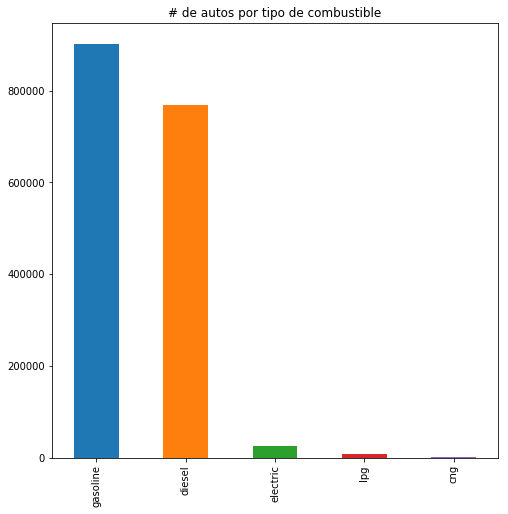

In [14]:
grafico = datos.combustible.value_counts().plot.bar(figsize=(8,8))
grafico.set_title('# de autos por tipo de combustible')

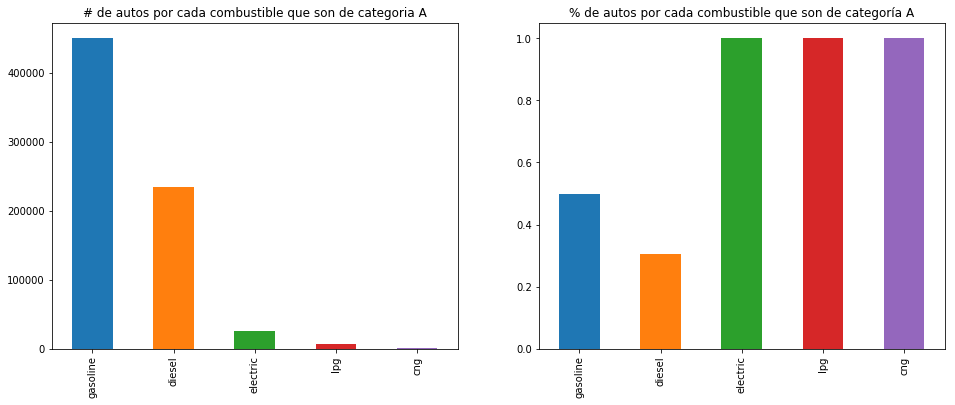

In [15]:
f,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].set_title('# de autos por cada combustible que son de categoria A')
datos[datos.categoria_auto == 'A'].combustible.value_counts().plot.bar(ax=ax[0])
ax[1].set_title('% de autos por cada combustible que son de categoría A')
(datos[datos.categoria_auto == 'A'].combustible.value_counts() / datos.combustible.value_counts()).plot.bar(ax=ax[1])


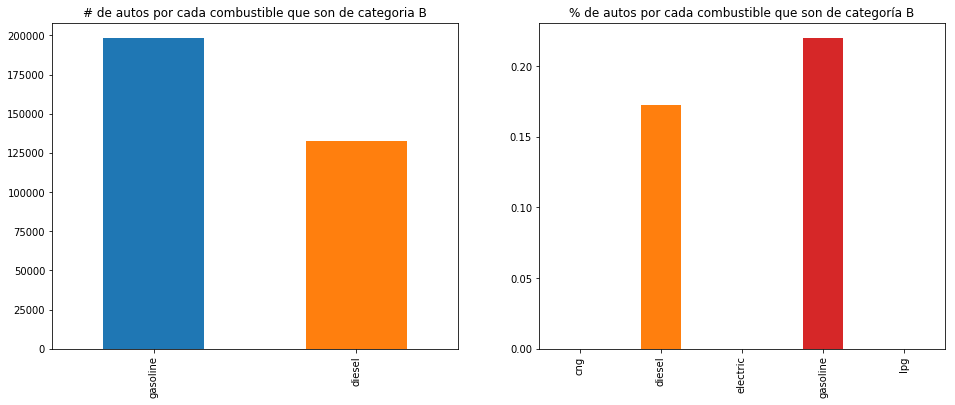

In [16]:
f,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].set_title('# de autos por cada combustible que son de categoria B')
datos[datos.categoria_auto == 'B'].combustible.value_counts().plot.bar(ax=ax[0])
ax[1].set_title('% de autos por cada combustible que son de categoría B')
(datos[datos.categoria_auto == 'B'].combustible.value_counts() / datos.combustible.value_counts()).plot.bar(ax=ax[1])

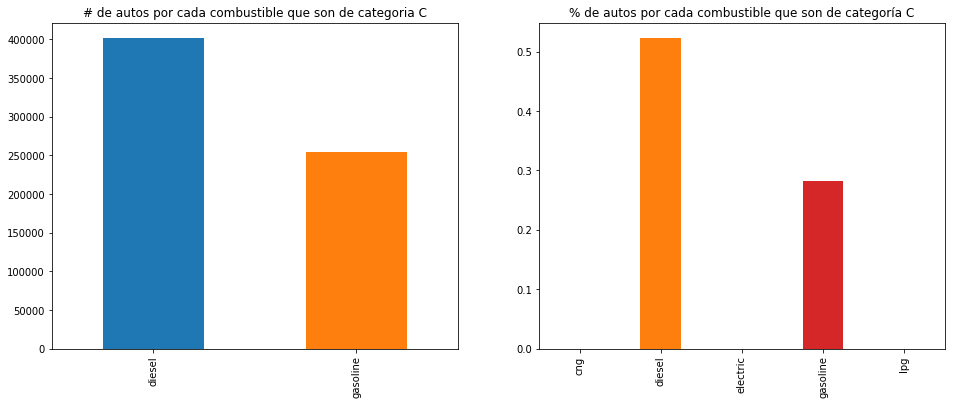

In [17]:
f,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].set_title('# de autos por cada combustible que son de categoria C')
datos[datos.categoria_auto == 'C'].combustible.value_counts().plot.bar(ax=ax[0])
ax[1].set_title('% de autos por cada combustible que son de categoría C')
(datos[datos.categoria_auto == 'C'].combustible.value_counts() / datos.combustible.value_counts()).plot.bar(ax=ax[1])

Los datos obtenidos al comparar la variable combustible con respecto a las distintas categorias fueron:

* El 100% de los autos cuyo combustibles son lpg, cng y electric pertenecen a la categoría A.
* Aproximadamente el 50% de autos a gasolina son de categoría A.
* Cerca de un 30% de los autos a diesel son de categoría A.
* Aproximadamente el 25% de autos a gasolina son de categoría B.
* Cerca de un 18% de los autos a diesel son de categoría B.
* Aproximadamente el 30% de autos a gasolina son de categoría C. 
* Cerca de un 50% de los autos a diesel son de categoría C.



#### Variable: transmision

Text(0.5,1,'% de autos por tipo de transmisión')

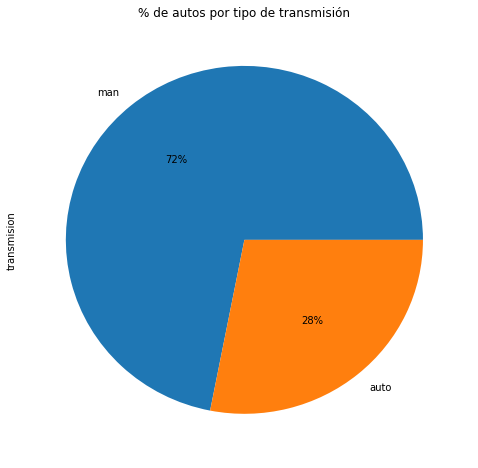

In [18]:
grafico = datos.transmision.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))
grafico.set_title('% de autos por tipo de transmisión')

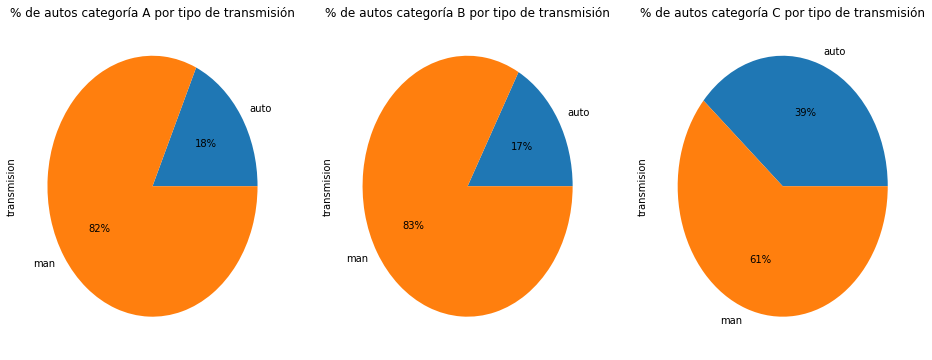

In [19]:
f,ax=plt.subplots(1,3,figsize=(16,6))

ax[0].set_title('% de autos categoría A por tipo de transmisión')
datos[datos.categoria_auto == 'A'].transmision.value_counts().sort_index().plot.pie(ax=ax[0], autopct='%1.0f%%')
ax[1].set_title('% de autos categoría B por tipo de transmisión')
datos[datos.categoria_auto == 'B'].transmision.value_counts().sort_index().plot.pie(ax=ax[1], autopct='%1.0f%%')
ax[2].set_title('% de autos categoría C por tipo de transmisión')
datos[datos.categoria_auto == 'C'].transmision.value_counts().sort_index().plot.pie(ax=ax[2], autopct='%1.0f%%')

Con estos datos obtenidos podemos decir que:

* El 82% de los autos de categoría A poseen transmisión manual. Mientras que el 18% posee transmisión automática.
* El 83% de los autos de categoría B poseen transmisión manual, mientras que el 17% posee transmisión automática.
* El 61% de los autos de categoría C poseen transmisión manual, mientras que el 39% posee transmisión automática.

Con esto podemos pensar que la transmisión que posee el coche no es uno de los factores que más influye en su precio ya que se encuentra distribuído de forma similar en las 3 categorías, pero en caso de que un auto posea transmisión automática tiene más probabilidad de ser un auto de categoría C, es decir, un auto más caro.

#### Variable: tipo_carroceria

Text(0.5,1,'# de autos por tipo de carrocería')

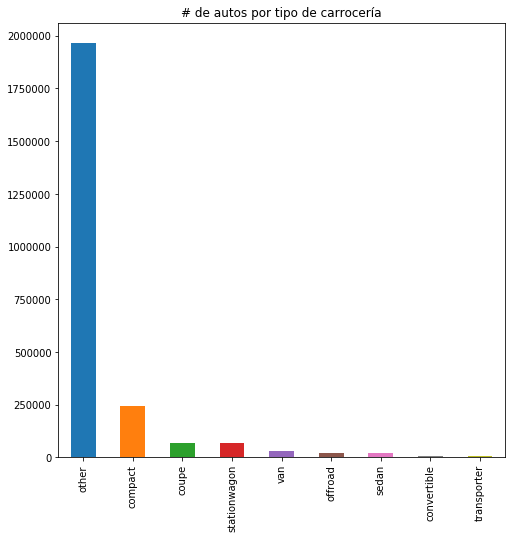

In [20]:
grafico = datos.tipo_carroceria.value_counts().plot.bar(figsize=(8,8))
grafico.set_title('# de autos por tipo de carrocería')

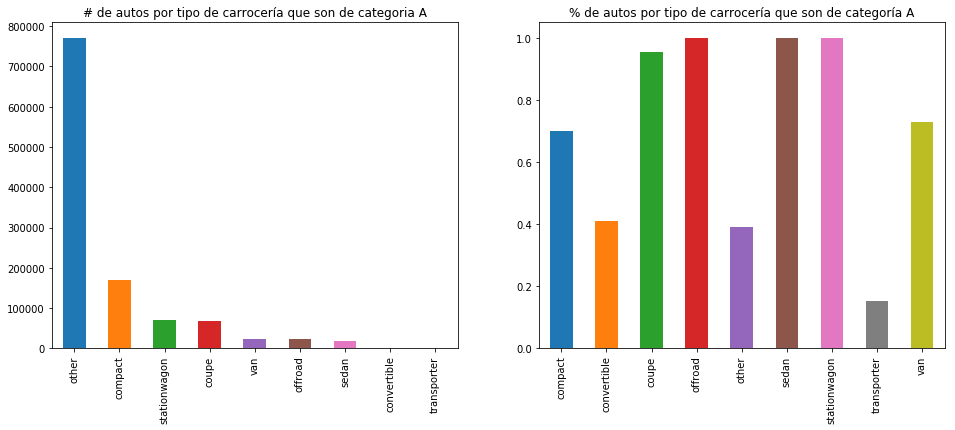

In [21]:
f,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].set_title('# de autos por tipo de carrocería que son de categoria A')
datos[datos.categoria_auto == 'A'].tipo_carroceria.value_counts().plot.bar(ax=ax[0])
ax[1].set_title('% de autos por tipo de carrocería que son de categoría A')
(datos[datos.categoria_auto == 'A'].tipo_carroceria.value_counts() / datos.tipo_carroceria.value_counts()).plot.bar(ax=ax[1])

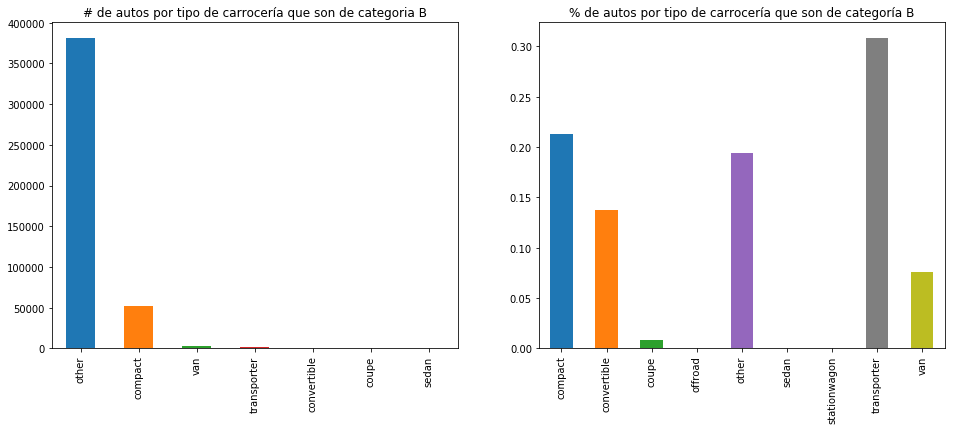

In [22]:
f,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].set_title('# de autos por tipo de carrocería que son de categoria B')
datos[datos.categoria_auto == 'B'].tipo_carroceria.value_counts().plot.bar(ax=ax[0])
ax[1].set_title('% de autos por tipo de carrocería que son de categoría B')
(datos[datos.categoria_auto == 'B'].tipo_carroceria.value_counts() / datos.tipo_carroceria.value_counts()).plot.bar(ax=ax[1])

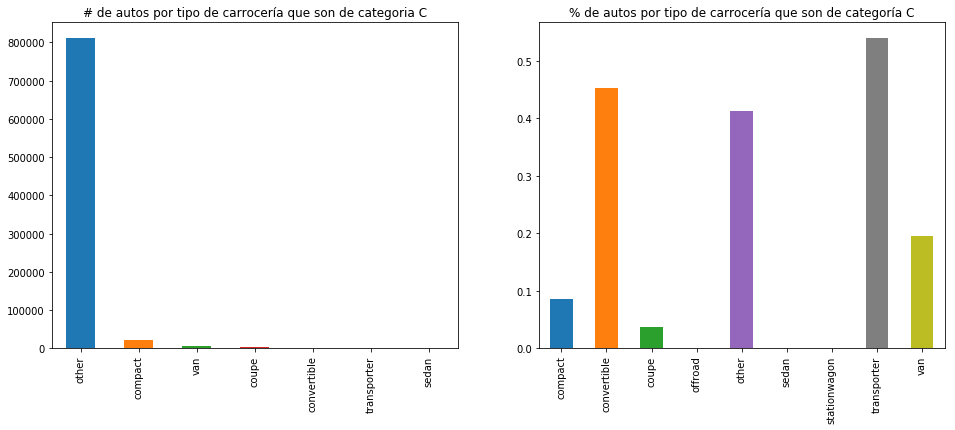

In [23]:
f,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].set_title('# de autos por tipo de carrocería que son de categoria C')
datos[datos.categoria_auto == 'C'].tipo_carroceria.value_counts().plot.bar(ax=ax[0])
ax[1].set_title('% de autos por tipo de carrocería que son de categoría C')
(datos[datos.categoria_auto == 'C'].tipo_carroceria.value_counts() / datos.tipo_carroceria.value_counts()).plot.bar(ax=ax[1])

Los datos obtenidos al comparar la variable de tipo de carroceria con respecto a las distintas categorias fueron:

* El 100% de los autos que tienen carrocería de tipo offroad, sedan o stationwagen pertenecen a la categoría A.
* Aproximadamente el 92% de autos de tipo coupe son de categoría A, aproximadamente un 2% son de categoría B y el 6% restante pertenecen a la categoría C. 
* Cerca de un 72% de los autos de tipo van pertencen a la categoría A, aproximadamente un 8% pertenecen a la categoría B y el 20% restante pertenece a la categoría C.
* En cuanto al tipo de carrocería compact, un 70% de autos de este tipo pertenece a la categoría A, un 21% pertenece a la categoría B y un 9% a la categoría C.
* Los autos de tipo convertible, un 40% son de categoría A, un 15% categoría B y el 45% restante pertenecen a la categoría C.
* Con respecto a los tipo transporter, 15% están dentro de la categoría A, un 30% dentro de la categoría B y el 55% restante se encuentra dentro de la categoría C.
* Por último, los anuncios que especificaron como tipo de carrocería otro, el 40% son de categoría A, el 20% de categoría B y el 40% restante de categoría C.

#### Correlaciones entre variables

A continuación vamos a graficar y analizar la correlación que posee la variable de salida con respecto a otras variables que no analizamos anteriormente.

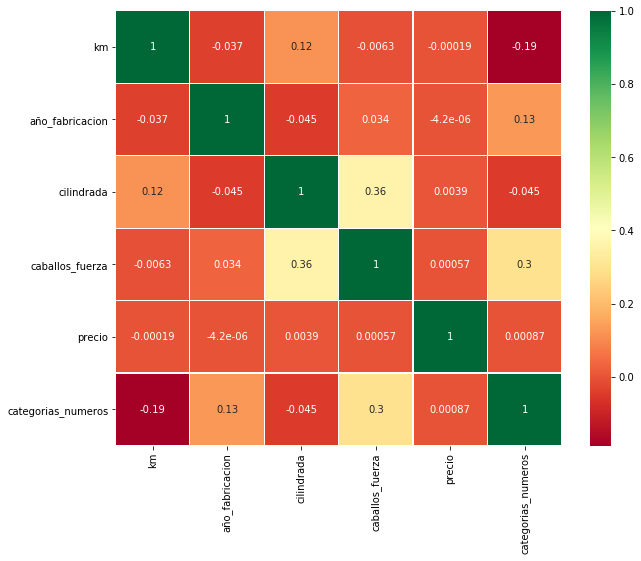

In [24]:
datos["categorias_numeros"] = datos.categoria_auto.replace(['A','B','C'], [1,2,3])
sns.heatmap(datos.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Observando los datos obtenidos en la gráfica podemos decir:

* El coheficiente de correlación entre la variable km y categorias_numeros es de -0,19, lo que significa que a medida que aumenten la cantidad de kilómetros que tiene un auto, su precio va a disminuir. 
* La correlación entre año_fabricacion y categorias_numeros es de 0,13 por lo que a medida que aumente el año de fabricación de los autos, su precio va a aumentar, es decir, los autos más nuevos tendrán un mayor precio que los viejos. 
* En cuanto a los caballos de fuerza, el coheficiente es de 0,3, es decir, a mayor caballos de fuerza, mayor va a ser el precio del auto. 

Todos los datos obtenidos fueron calculados sin realizar acciones de limpieza y pre-procesado de los datos, ya que tenemos un par de dudas en cuanto a ese tema y en la consigna no aclaraba nada respecto a eso. 